# UCI Dataset Preprocessing

1. Load Dataset

2. Handle missing values

3. Scale Dataset

4. Export preprocessed Dataset

In [20]:
import pandas as pd
import numpy as np
import os
import math
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import pickle
import calendar

### Load and preprocessed UCI Dataset: 

Source:

Georges Hebrail (georges.hebrail '@' edf.fr), Senior Researcher, EDF R&D, Clamart, France

Alice Berard, TELECOM ParisTech Master of Engineering Internship at EDF R&D, Clamart, France
https://archive.ics.uci.edu/ml/datasets/individual+household+electric+power+consumption


Data Set Information:

This archive contains 2075259 measurements gathered in a house located in Sceaux (7km of Paris, France) between December 2006 and November 2010 (47 months).

Notes:

1.(global_active_power*1000/60 - sub_metering_1 - sub_metering_2 - sub_metering_3) represents the active energy consumed every minute (in watt hour) in the household by electrical equipment not measured in sub-meterings 1, 2 and 3.

2.The dataset contains some missing values in the measurements (nearly 1,25% of the rows). All calendar timestamps are present in the dataset but for some timestamps, the measurement values are missing: a missing value is represented by the absence of value between two consecutive semi-colon attribute separators. For instance, the dataset shows missing values on April 28, 2007.

In [31]:
repos_path = "../Data/01_raw_data"

In [32]:
temp = pd.read_csv(os.path.join(repos_path,"household_power_consumption.txt"), sep = ';', header=0, low_memory=False, 
            infer_datetime_format=True, parse_dates={'datetime':[0,1]}, index_col=['datetime'],na_values=['nan','?'])

#### Attribute Information:

1.   date: Date in format dd/mm/yyyy

2. time: time in format hh:mm:ss

3. global_active_power: household global minute-averaged active power (in kilowatt)

4. global_reactive_power: household global minute-averaged reactive power (in kilowatt)

5. voltage: minute-averaged voltage (in volt)

6. global_intensity: household global minute-averaged current intensity (in ampere)

7. sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).

8. sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.

9. sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.



In [33]:
temp.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [34]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


In [35]:
missing_values = np.zeros((25979))
j = 0
for i in range(len(temp['Global_active_power'])):
    if math.isnan(temp['Global_active_power'][i]):
        missing_values[j] = i
        j+=1

temp.iloc[missing_values[:5]]

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-21 11:23:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-21 11:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-30 10:08:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-30 10:09:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-14 18:36:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We are going to drop the consecutive NANs if the group is too huge.

70


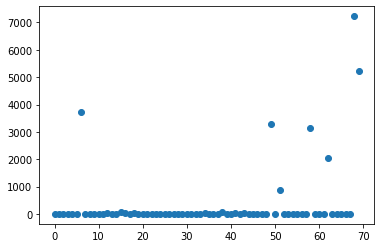

In [36]:
group_missing_values = []

element = missing_values[0]
group_list = [element]
for i in missing_values[1:]:
    if element == i-1:
        group_list.append(i)
    else :
        group_missing_values.append(group_list)
        group_list = [i]
    element = i

x = np.arange(len(group_missing_values))
size_Nan_groups = [len(i) for i in group_missing_values]

plt.scatter(x, size_Nan_groups)

print(len(x))

We can see on the graph that the large majority of NaNs are isolated. We can use a rooling mean or an interpolation to correct them. But a few groups are huge, with more than 14 hours without data. We are going to remove the corresponding day(s).

In [37]:
index_huge_group = {}

for k in range(len(size_Nan_groups)) :
    i = size_Nan_groups[k]
    if i > 120:
        S = sum(size_Nan_groups[:k])
        index_huge_group[int(missing_values[S])] = i
  
for key in index_huge_group.keys():
    print("Remove from ", temp.index[key].date(), " until ", temp.index[key + index_huge_group[key]].date())

Remove from  2007-04-28  until  2007-04-30
Remove from  2009-06-13  until  2009-06-15
Remove from  2009-08-13  until  2009-08-13
Remove from  2010-01-12  until  2010-01-14
Remove from  2010-03-20  until  2010-03-21
Remove from  2010-08-17  until  2010-08-22
Remove from  2010-09-25  until  2010-09-28


In [62]:
temp_fill = temp.copy(deep=False)

for key in index_huge_group.keys():
    Date_1 = temp_fill.index[key].date()
    Date_1 = Date_1.strftime("%Y-%m-%d")
    Date_1 = pd.Timestamp(Date_1 + ' 00:00:00')
    Date_2 = temp_fill.index[key + index_huge_group[key]].date()
    Date_2 = Date_2.strftime("%Y-%m-%d")
    Date_2 = pd.Timestamp(Date_2 + ' 23:59:59')
    print(Date_1, Date_2)

    temp_fill = temp_fill[(temp_fill.index <= Date_1) | (temp_fill.index >= Date_2)]

print(temp_fill.isna().sum())

2007-04-28 00:00:00 2007-04-30 23:59:59
2009-06-16 00:00:00 2009-06-18 23:59:59
2009-08-19 00:00:00 2009-08-19 23:59:59
2010-01-19 00:00:00 2010-01-21 23:59:59
2010-03-30 00:00:00 2010-03-31 23:59:59
2010-08-29 00:00:00 2010-09-03 23:59:59
2010-10-13 00:00:00 2010-10-16 23:59:59
Global_active_power      22256
Global_reactive_power    22256
Voltage                  22256
Global_intensity         22256
Sub_metering_1           22256
Sub_metering_2           22256
Sub_metering_3           22256
dtype: int64


In [69]:
temp_GAP = temp_fill[['Global_active_power']]
print(temp_GAP.isna().sum())

Global_active_power    22256
dtype: int64


We can choose to drop or imput the missing values. We will try here the second solution using the data from the day before as it can be done in several work like this one:

https://machinelearningmastery.com/multi-step-time-series-forecasting-with-machine-learning-models-for-household-electricity-consumption/

In [71]:
import datetime

# fill missing values with a value at the same time one day ago

def fill_missing(df):
    i = 0
    for date in df.index:
        if i%100000 == 0:
            print(i)
        if np.isnan(df.loc[date][0]):
            day = str(df.index.date[i])
            day_1 = str(df.index.date[i] - datetime.timedelta(days=1))
            if(not(np.isnan(df['Global_active_power'].loc[day].mean(skipna=True)))):
                df['Global_active_power'].loc[date] = df['Global_active_power'].loc[date -  datetime.timedelta(days=1)]/df['Global_active_power'].loc[day_1].mean(skipna=True)*df['Global_active_power'].loc[day].mean(skipna=True)
            else:
                df.loc[date] = df.loc[date -  datetime.timedelta(days=1)]   
        i+=1
    return(df)

temp_GAP_fill = fill_missing(temp_GAP)

print(temp_GAP_fill.isna().sum())

0


<ipython-input-71-26c61c7e52a7>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Global_active_power'].loc[date] = df['Global_active_power'].loc[date -  datetime.timedelta(days=1)]/df['Global_active_power'].loc[day_1].mean(skipna=True)*df['Global_active_power'].loc[day].mean(skipna=True)


100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000


D:\Telecom\3A_ETH\Semester Thesis\Semester Thesis\venv_38\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-71-26c61c7e52a7>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[date] = df.loc[date -  datetime.timedelta(days=1)]


1400000
1500000
1600000
1700000
1800000
1900000
2000000
Global_active_power    0
dtype: int64


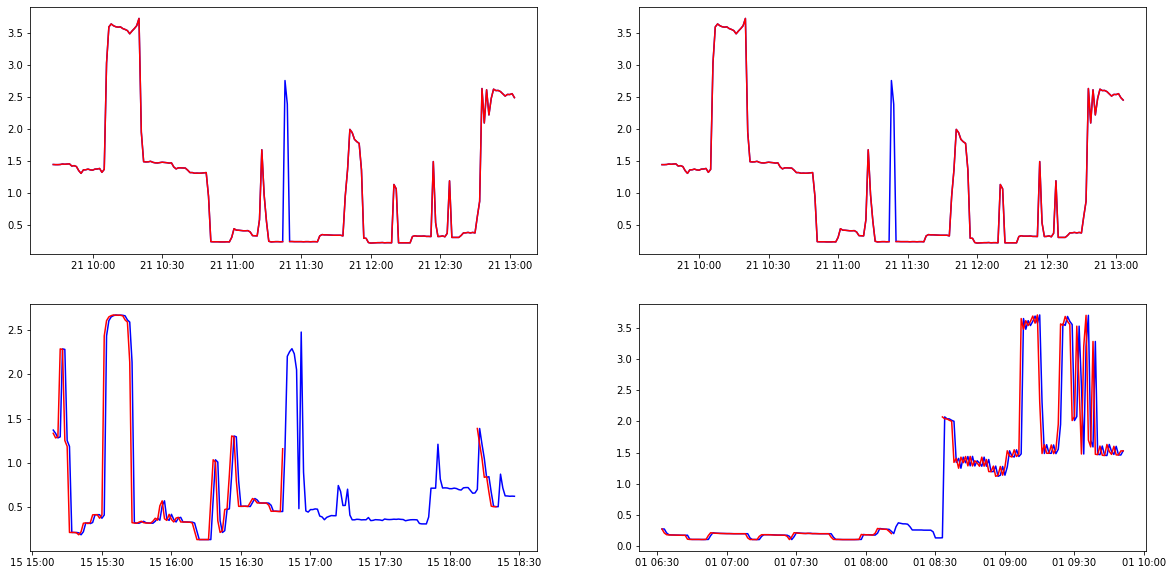

In [72]:
index1 = int(missing_values[0])
index2 = int(missing_values[1])
# index3 = int(missing_values[2])
# index4 = int(missing_values[3])

S3 = sum(size_Nan_groups[:15])
S4 = sum(size_Nan_groups[:18])

index3 = int(missing_values[S3])
index4 = int(missing_values[S4])

f = plt.figure(figsize=(20,10))
ax1 = f.add_subplot(221)
ax1.plot(temp.index[index1-100: index1+100], temp_GAP_fill['Global_active_power'][index1-100: index1 + 100], 'b')
ax1.plot(temp.index[index1-100: index1+100], temp['Global_active_power'][index1-100: index1 + 100], 'r')

ax2 = f.add_subplot(222)
ax2.plot(temp.index[index2-100: index2+100], temp_GAP_fill['Global_active_power'][index2-100: index2 + 100], 'b')
ax2.plot(temp.index[index2-100: index2+100], temp['Global_active_power'][index2-100: index2 + 100], 'r')

ax3 = f.add_subplot(223)
ax3.plot(temp.index[index3-100: index3+100], temp_GAP_fill['Global_active_power'][(index3 - 4320)-100: (index3 - 4320) + 100], 'b')
ax3.plot(temp.index[index3-100: index3+100], temp['Global_active_power'][index3-100: index3 + 100], 'r')

ax4 = f.add_subplot(224)
ax4.plot(temp.index[index4-100: index4+100], temp_GAP_fill['Global_active_power'][(index4 - 4320)-100: (index4  - 4320) + 100], 'b')
ax4.plot(temp.index[index4-100: index4+100], temp['Global_active_power'][index4 - 100: index4 + 100], 'r')
plt.show()

We can see that this tool works pretty well even if some values can be interpreted as outliers.

#### Aggregate to hour dataset

In [73]:
# resample data to hourly
hourly_groups = temp_GAP_fill.resample('H')
hourly_data = hourly_groups.sum()

In [74]:
hourly_data.head()

,Global_active_power
datetime,
2006-12-16 17:00:00,152.024
2006-12-16 18:00:00,217.932
2006-12-16 19:00:00,204.014
2006-12-16 20:00:00,196.114
2006-12-16 21:00:00,183.388


#### Data scaling

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))

print("Min minute: ", temp_fill['Global_active_power'].min(axis=0))
print("Max minute: ", temp_fill['Global_active_power'].max(axis=0))

print("Min hourly: ", hourly_data['Global_active_power'].min(axis=0))
print("Max hourly: ", hourly_data['Global_active_power'].max(axis=0))


"""temp_fill[['Global_active_power', 'Global_reactive_power','Voltage','Global_intensity','Sub_metering_1','Sub_metering_2',
           'Sub_metering_3']] = scaler.fit_transform(temp_fill[['Global_active_power', 'Global_reactive_power',
                        'Voltage','Global_intensity','Sub_metering_1', 'Sub_metering_2','Sub_metering_3']])
          
hourly_data[['Global_active_power', 'Global_reactive_power','Voltage','Global_intensity','Sub_metering_1','Sub_metering_2',
           'Sub_metering_3']] = scaler.fit_transform(hourly_data[['Global_active_power', 'Global_reactive_power','Voltage',
                        'Global_intensity','Sub_metering_1','Sub_metering_2','Sub_metering_3']])"""

#### Export Dataset

In [75]:
preprocess_path = "../Data/02_preprocessed_data"

#temp_fill.to_csv(os.path.join(preprocess_path,"household_power_consumption_processed.csv"), sep = ';')

hourly_data.to_csv(os.path.join(preprocess_path,"household_power_consumption_processed_hourly.csv"), sep = ';')
